In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This code snippet is reading an Excel file named 'datos.xlsx' and loading all sheets into a dictionary called `sheets_dict`. The `sheet_name=None` parameter indicates that all sheets will be read.
sheets_dict = pd.read_excel('data/datos.xlsx', sheet_name = None)
df_list = []

for sheet_name, sheet_df in sheets_dict.items():
    sheet_df['Cliente'] = sheet_name
    df_list.append(sheet_df)

In [3]:
# Concatenando todos los df en uno solo
df = pd.concat(df_list, ignore_index=True)
df['Cliente']=df['Cliente'].str.replace('CLIENTE','C_')
print(df)

                     Fecha    Presion  Temperatura     Volumen Cliente
0      2019-01-14 00:00:00  17.732563    28.209354   20.969751     C_1
1      2019-01-14 01:00:00  17.747776    28.518614   17.845739     C_1
2      2019-01-14 02:00:00  17.758916    28.230191   20.975914     C_1
3      2019-01-14 03:00:00  17.727940    27.811509   20.592299     C_1
4      2019-01-14 04:00:00  17.746484    27.795293   21.690626     C_1
...                    ...        ...          ...         ...     ...
847955 2023-12-31 19:00:00  15.751139    27.460652  204.457549    C_20
847956 2023-12-31 20:00:00  15.614858    27.010382  186.512096    C_20
847957 2023-12-31 21:00:00  15.598944    26.709100  204.456461    C_20
847958 2023-12-31 22:00:00  15.730040    27.266090  203.695596    C_20
847959 2023-12-31 23:00:00  15.624457    27.481288  201.534548    C_20

[847960 rows x 5 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847960 entries, 0 to 847959
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Fecha        847960 non-null  datetime64[ns]
 1   Presion      847960 non-null  float64       
 2   Temperatura  847960 non-null  float64       
 3   Volumen      847960 non-null  float64       
 4   Cliente      847960 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 32.3+ MB


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha,847960,2021-07-08 22:08:19.659418112,2019-01-14 00:00:00,2020-04-13 23:00:00,2021-07-07 06:00:00,2022-10-06 02:15:00,2023-12-31 23:00:00,NaN
Presion,847960.0,16.072957,2.934873,17.09735,17.570449,17.694254,20.307852,4.186408
Temperatura,847960.0,25.198239,-5.257899,22.693027,25.379859,27.886244,50.019853,3.790497
Volumen,847960.0,62.328206,0.0,0.0,21.773567,99.319649,577.413425,80.498112


In [6]:
print("Tipos de datos en el DataFrame:\n", df.dtypes)
print("\nResumen estadístico de las variables numéricas:\n", df.describe())

Tipos de datos en el DataFrame:
 Fecha          datetime64[ns]
Presion               float64
Temperatura           float64
Volumen               float64
Cliente                object
dtype: object

Resumen estadístico de las variables numéricas:
                                Fecha        Presion    Temperatura  \
count                         847960  847960.000000  847960.000000   
mean   2021-07-08 22:08:19.659418112      16.072957      25.198239   
min              2019-01-14 00:00:00       2.934873      -5.257899   
25%              2020-04-13 23:00:00      17.097350      22.693027   
50%              2021-07-07 06:00:00      17.570449      25.379859   
75%              2022-10-06 02:15:00      17.694254      27.886244   
max              2023-12-31 23:00:00      20.307852      50.019853   
std                              NaN       4.186408       3.790497   

             Volumen  
count  847960.000000  
mean       62.328206  
min         0.000000  
25%         0.000000  
50%    

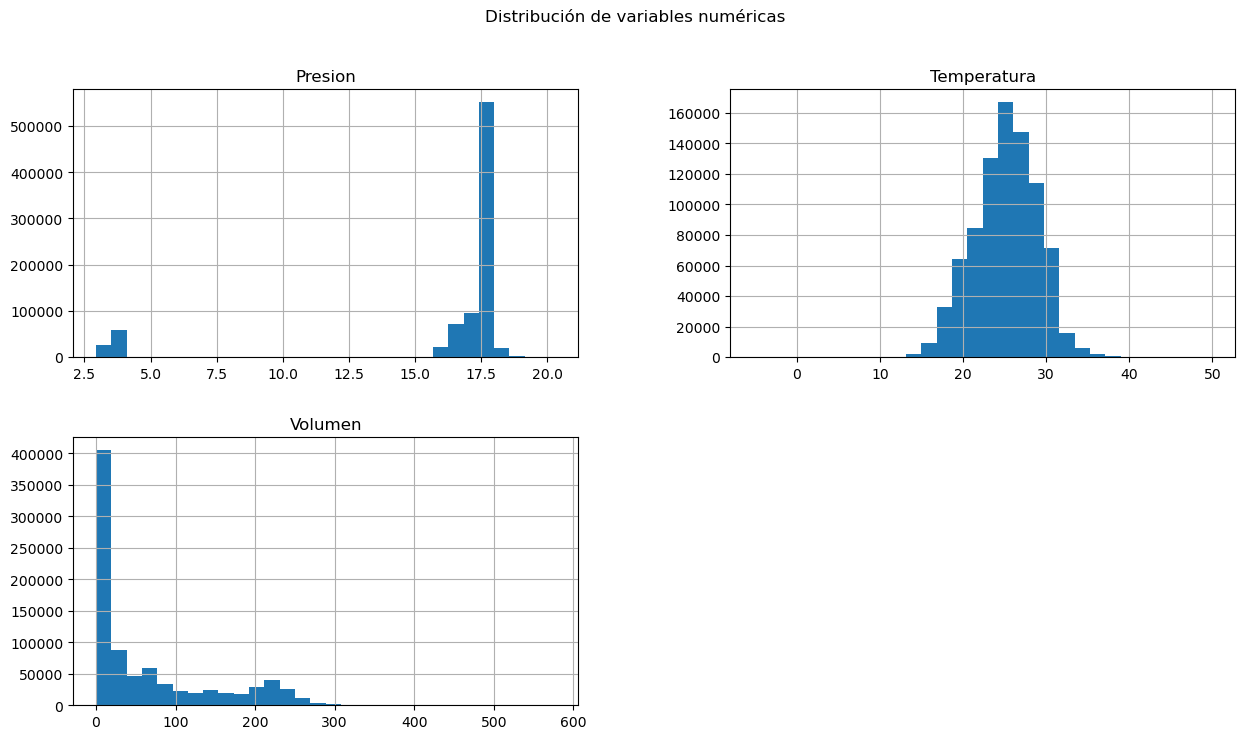

In [7]:
num_cols = ['Presion', 'Temperatura', 'Volumen']
df[num_cols].hist(bins=30, figsize=(15, 8))
plt.suptitle('Distribución de variables numéricas')
plt.show()

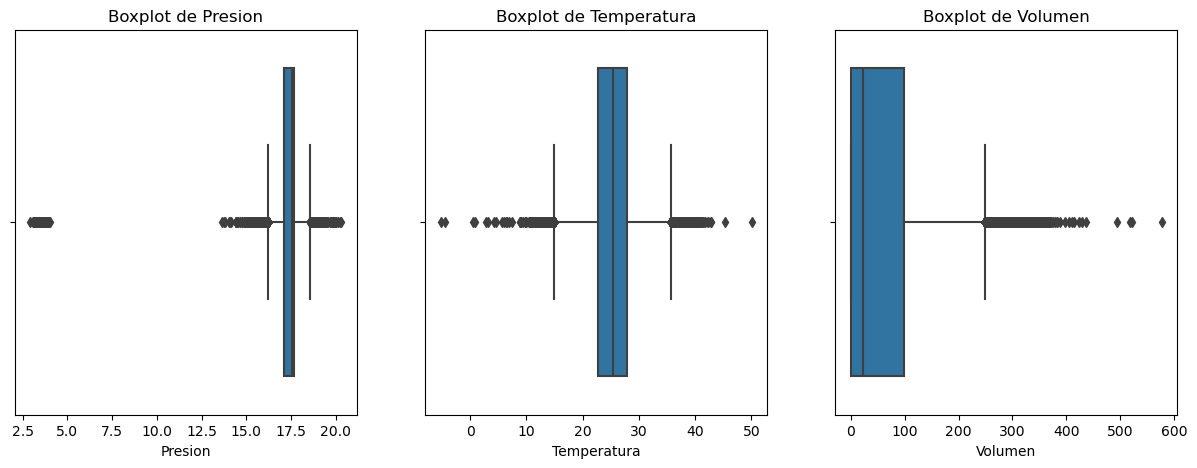

In [8]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
plt.show()

In [9]:
client_summary = df.groupby('Cliente').describe()
print(client_summary)

         Fecha                                                      \
         count                           mean                  min   
Cliente                                                              
C_1      43412  2021-07-08 04:49:12.759605760  2019-01-14 00:00:00   
C_10     41059  2021-06-23 09:03:15.698872320  2019-01-14 00:00:00   
C_11     42248  2021-07-05 06:31:24.785078784  2019-01-14 00:00:00   
C_12     41776  2021-07-11 00:48:56.288778240  2019-01-14 00:00:00   
C_13     41059  2021-06-23 09:03:15.698872320  2019-01-14 00:00:00   
C_14     43415  2021-07-08 12:20:26.479327488  2019-01-14 00:00:00   
C_15     42428  2021-07-05 23:29:50.751390464  2019-01-14 00:00:00   
C_16     43147  2021-07-10 08:40:15.630287104  2019-01-14 00:00:00   
C_17     43412  2021-07-08 04:49:12.759605760  2019-01-14 00:00:00   
C_18     41382  2021-07-22 19:05:32.405393664  2019-01-14 00:00:00   
C_19     42305  2021-07-13 17:20:38.491903744  2019-01-14 00:00:00   
C_2      41382  2021

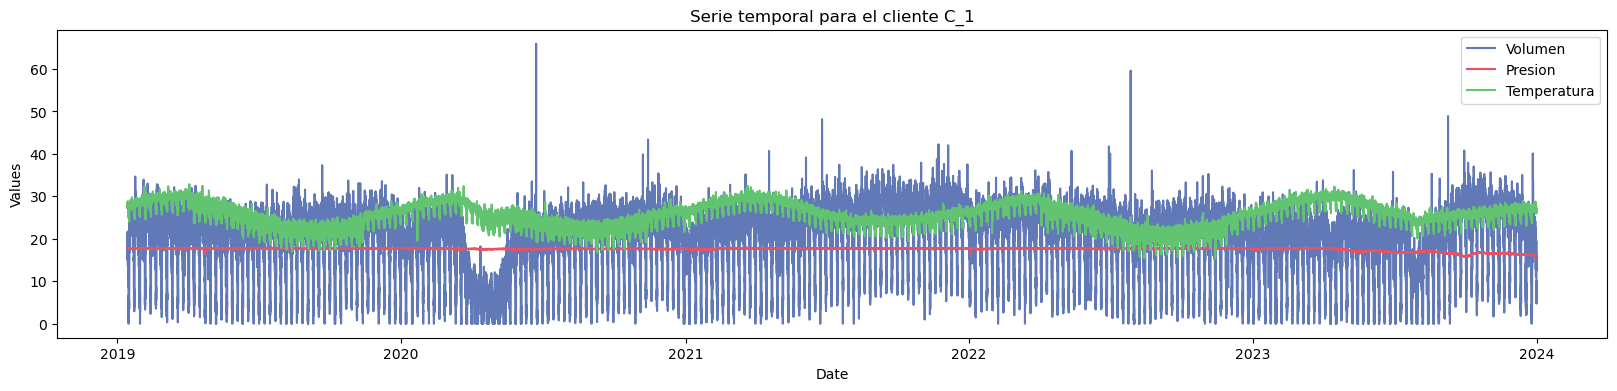

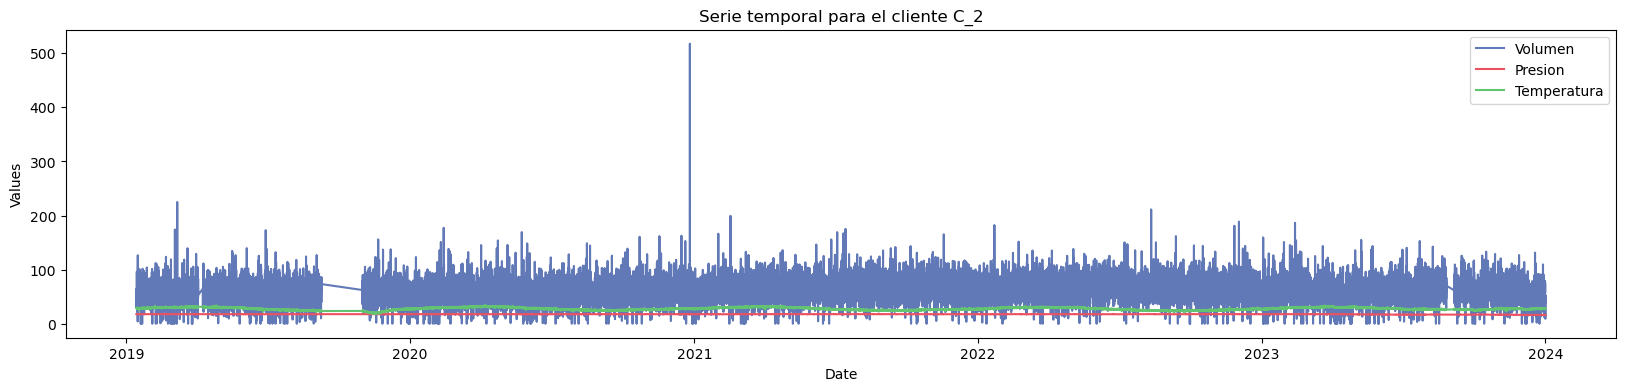

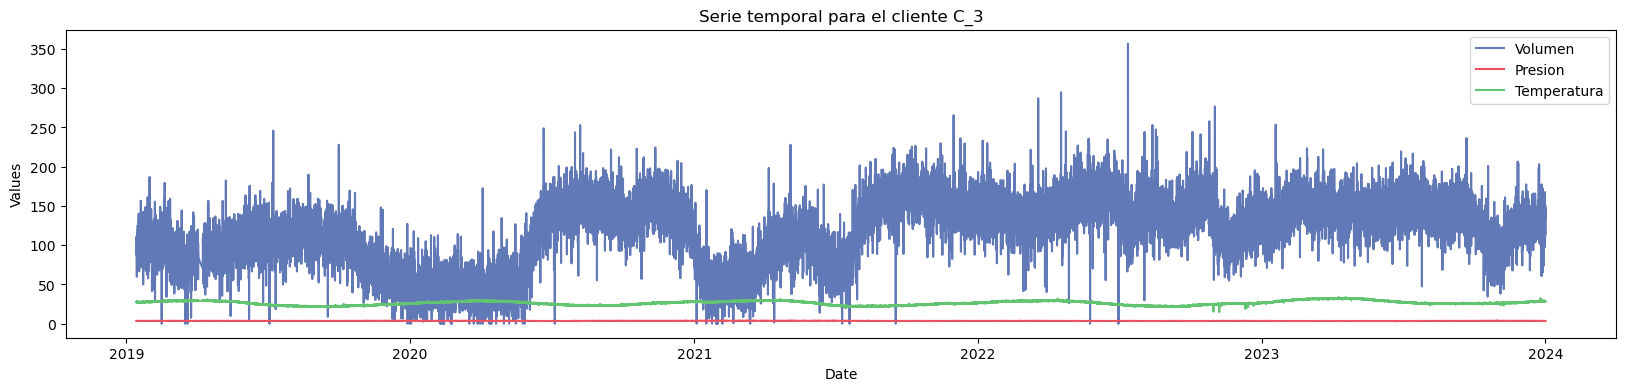

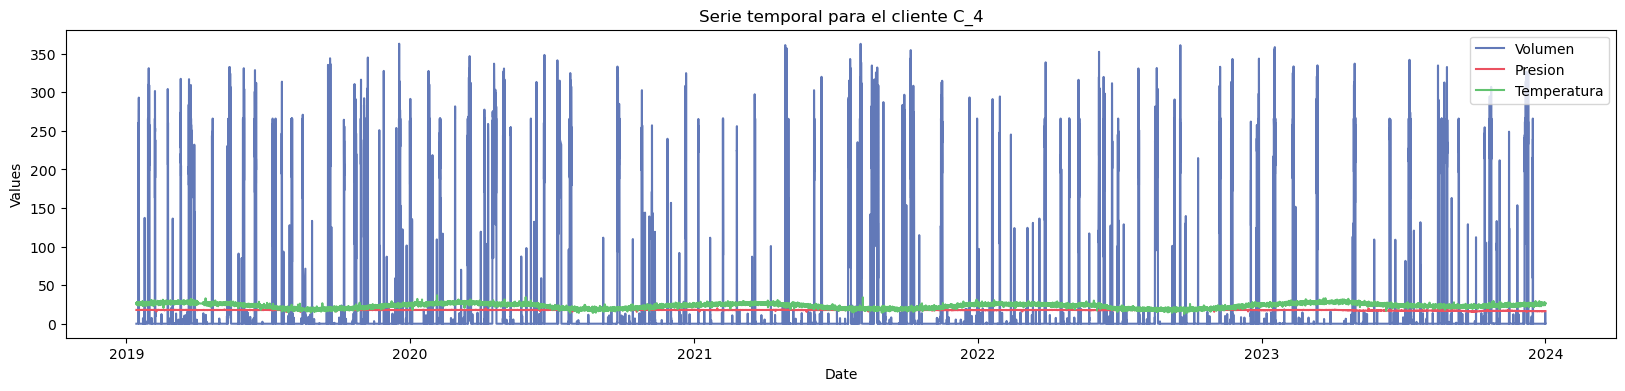

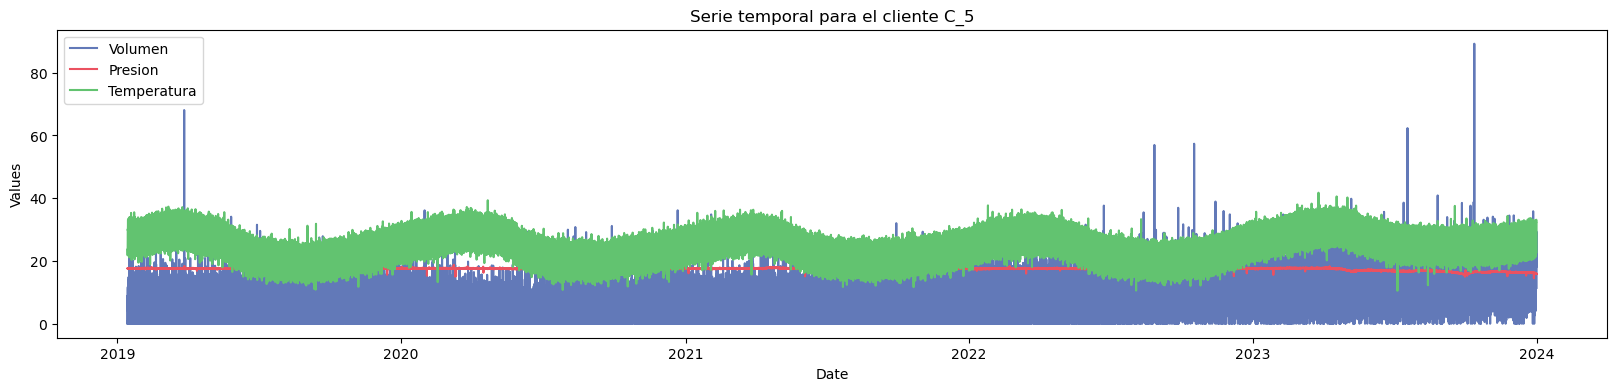

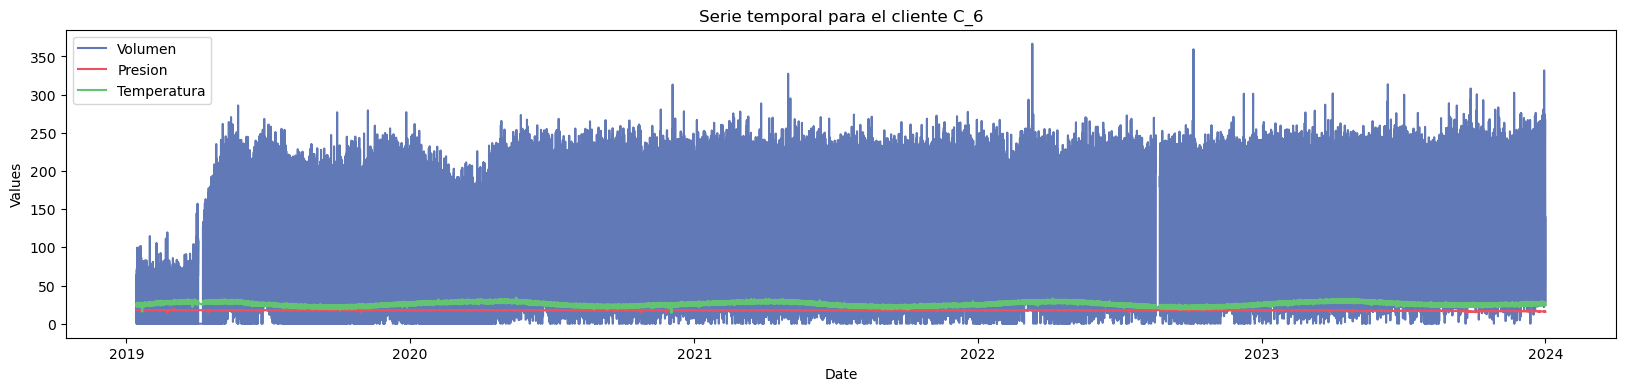

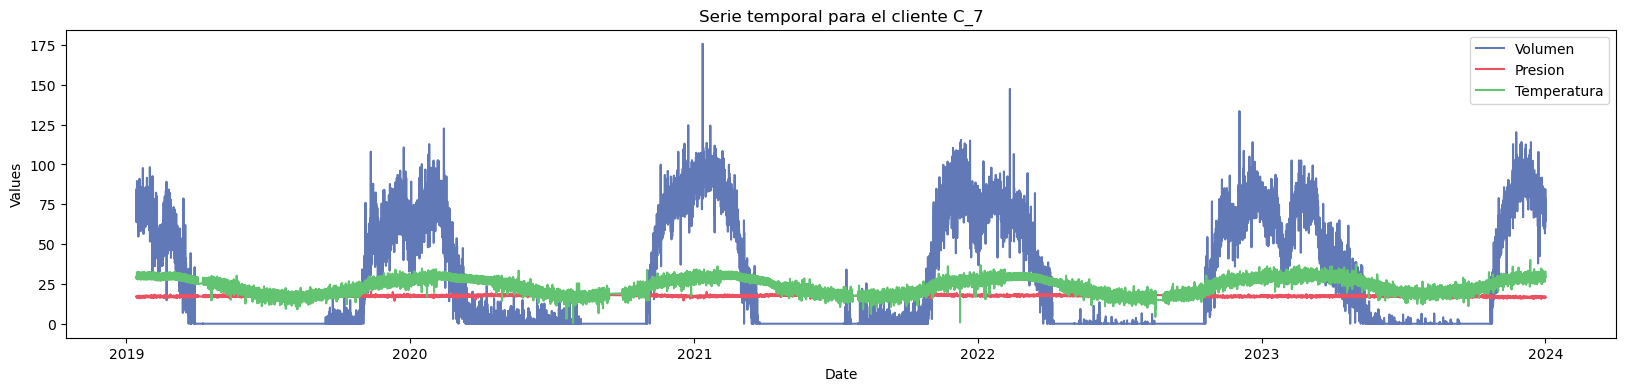

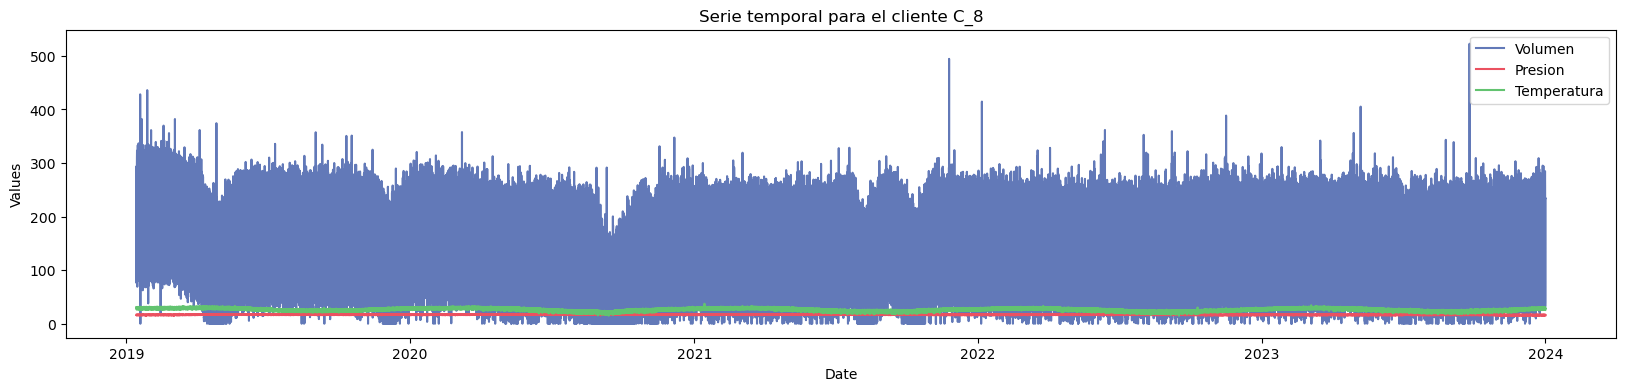

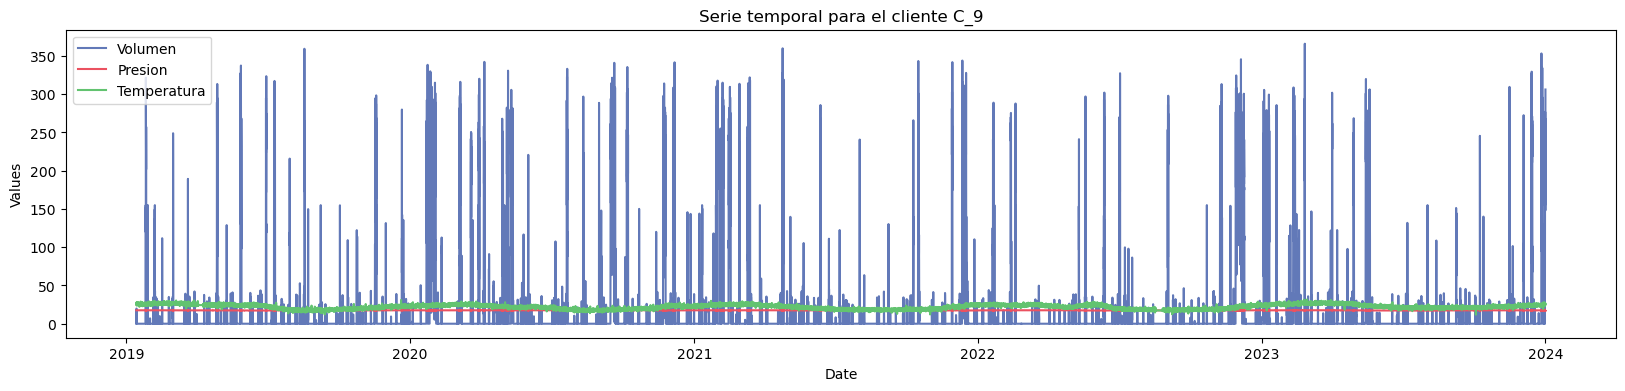

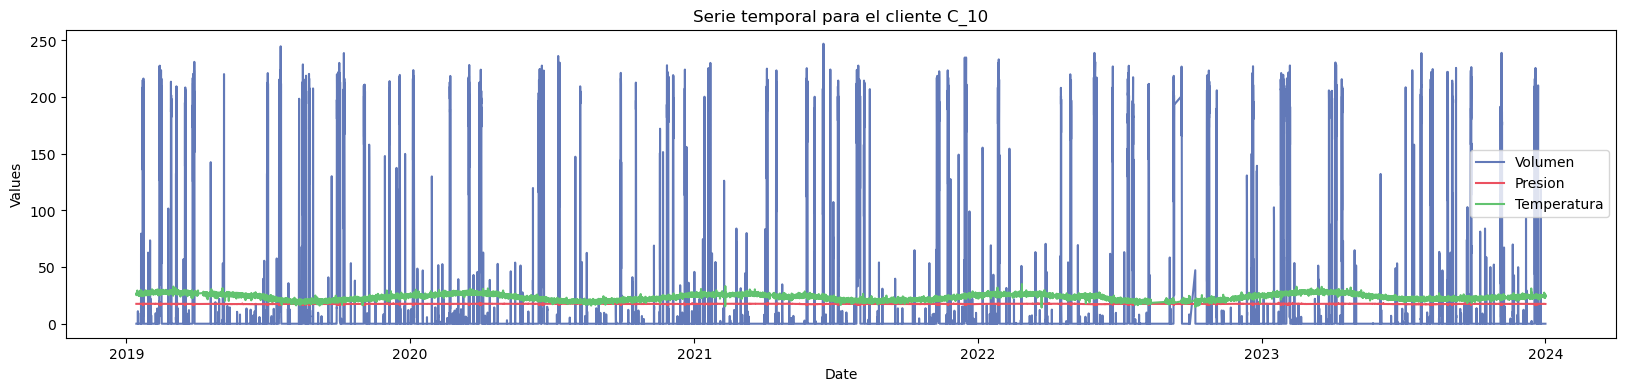

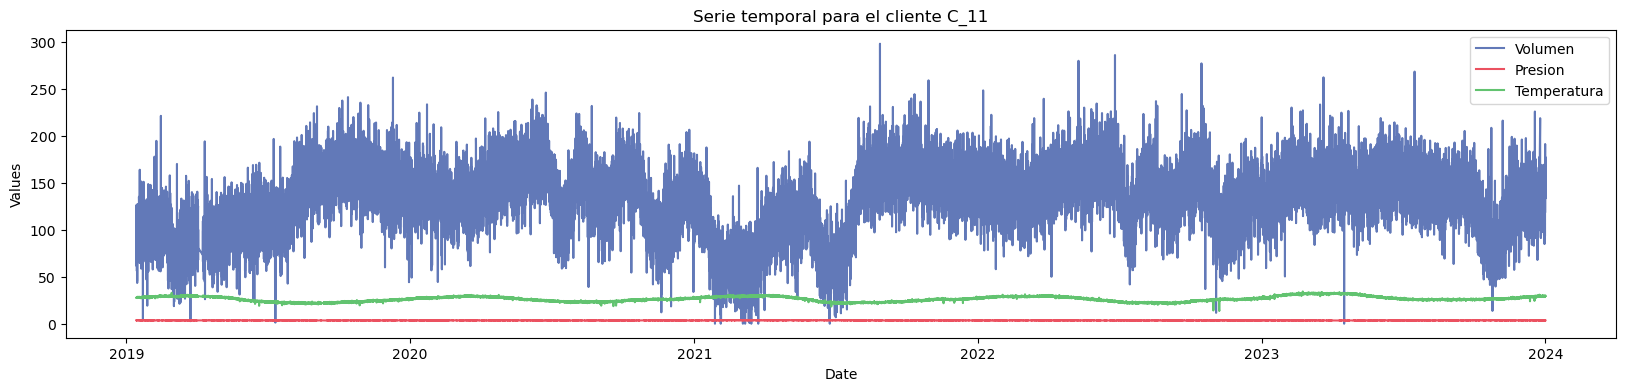

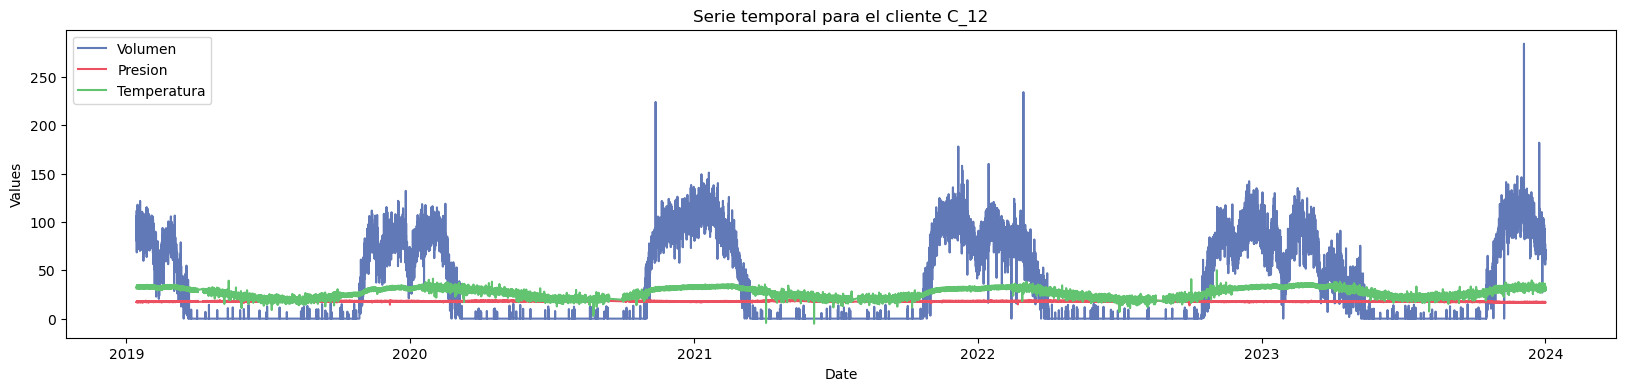

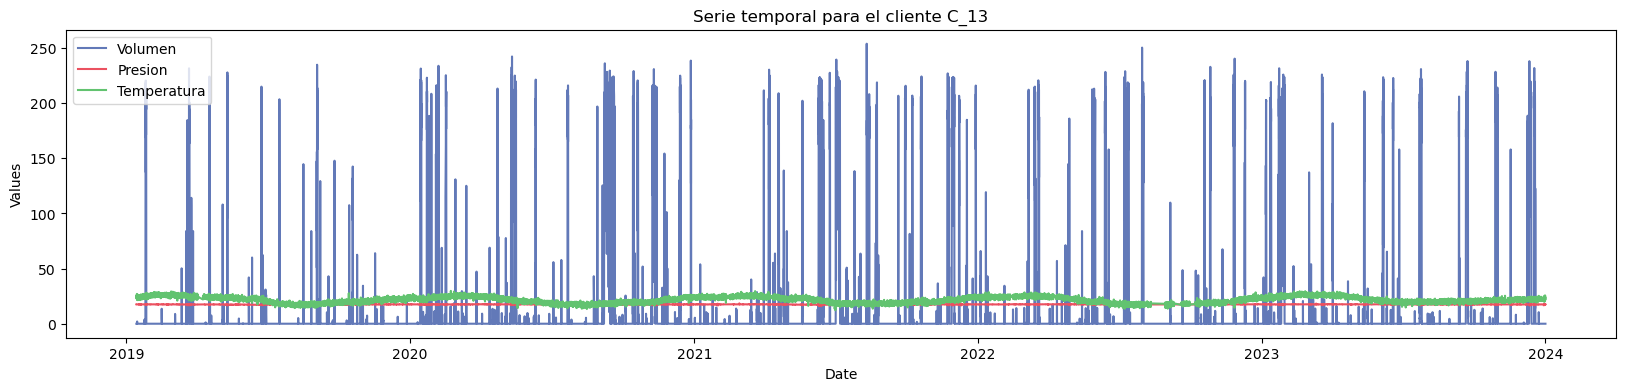

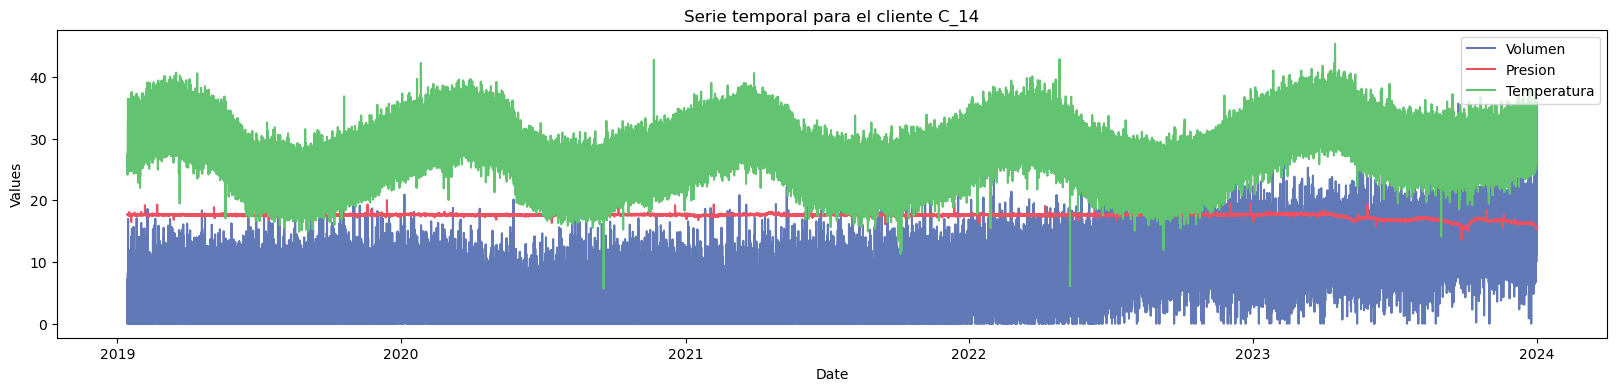

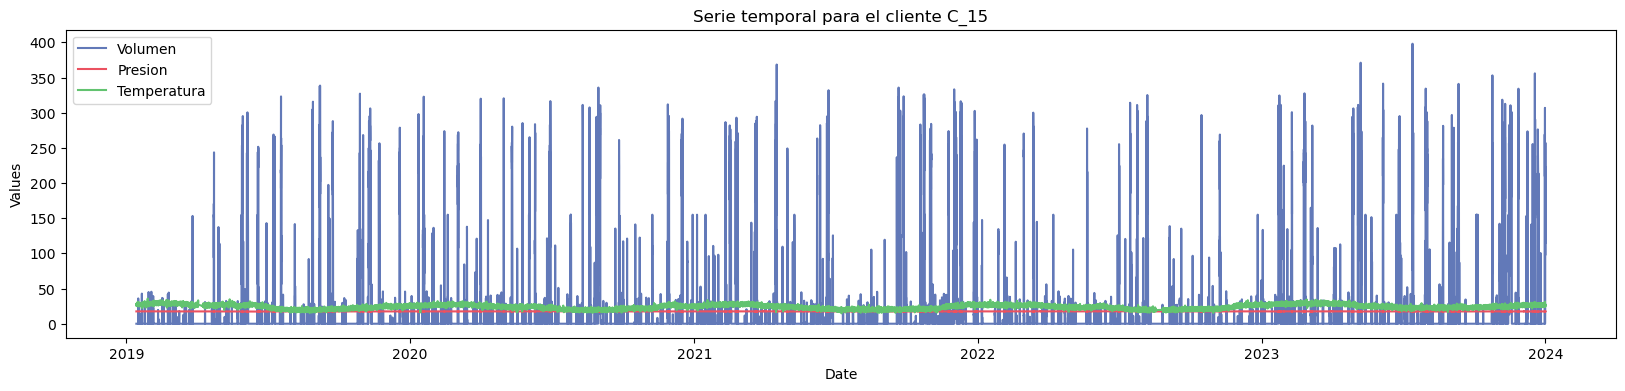

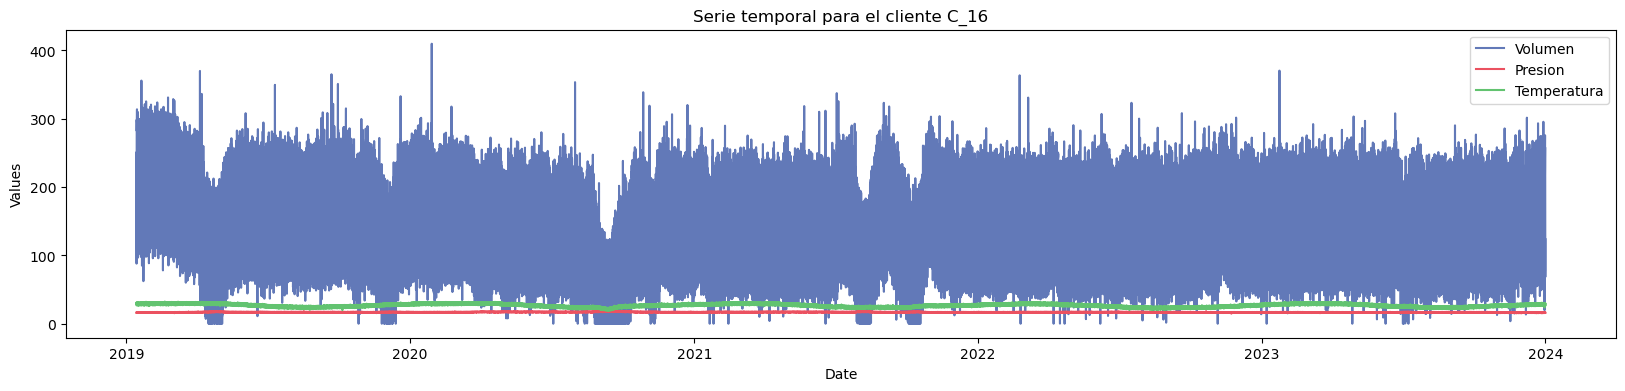

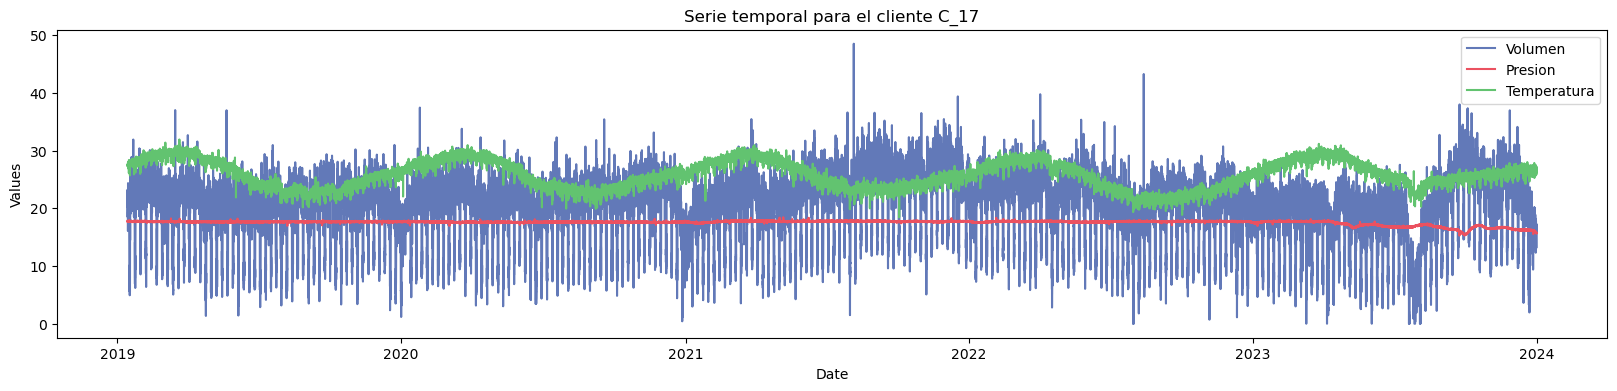

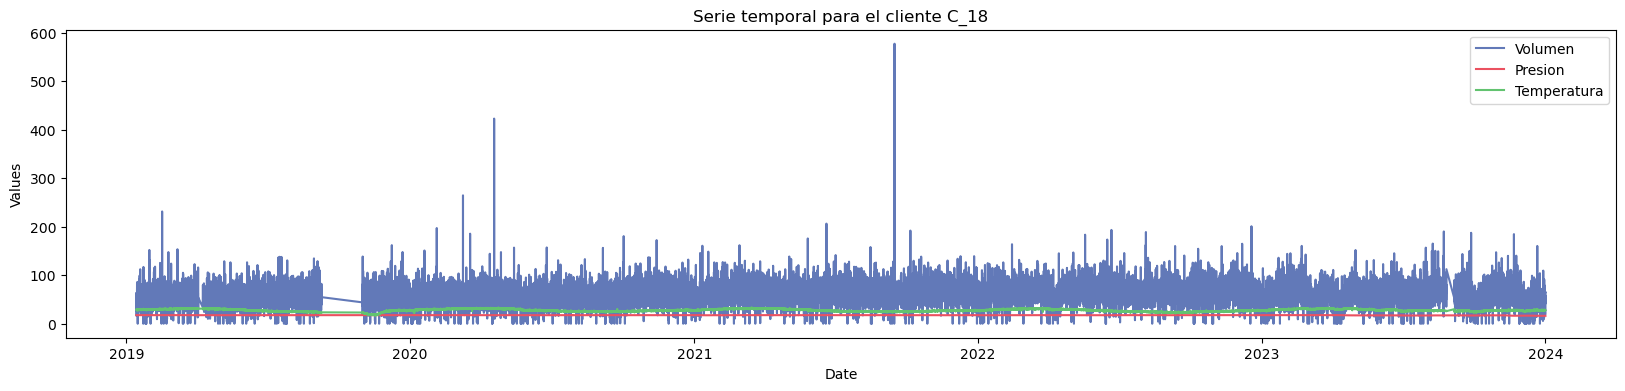

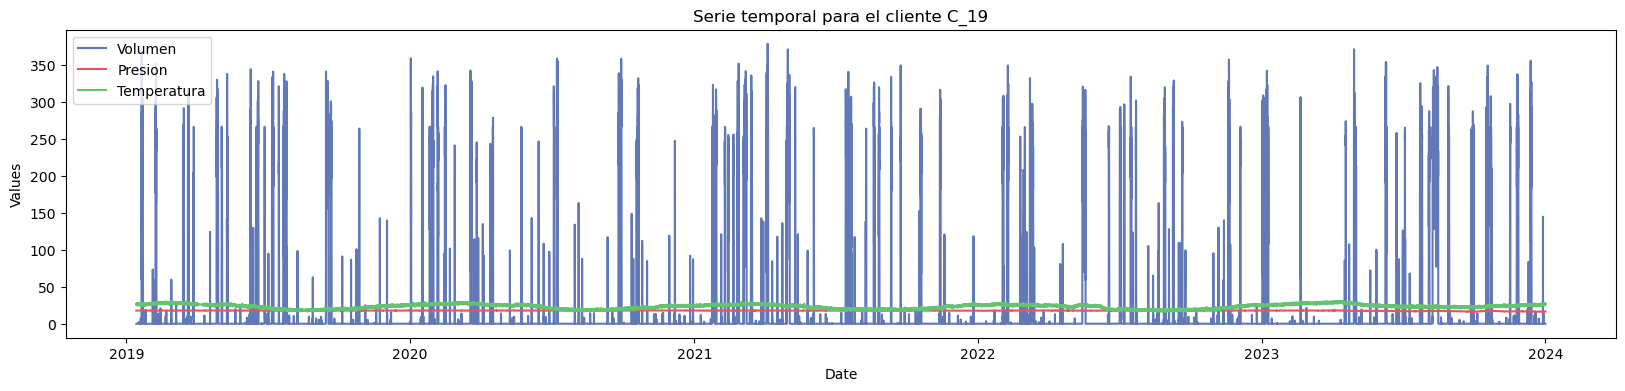

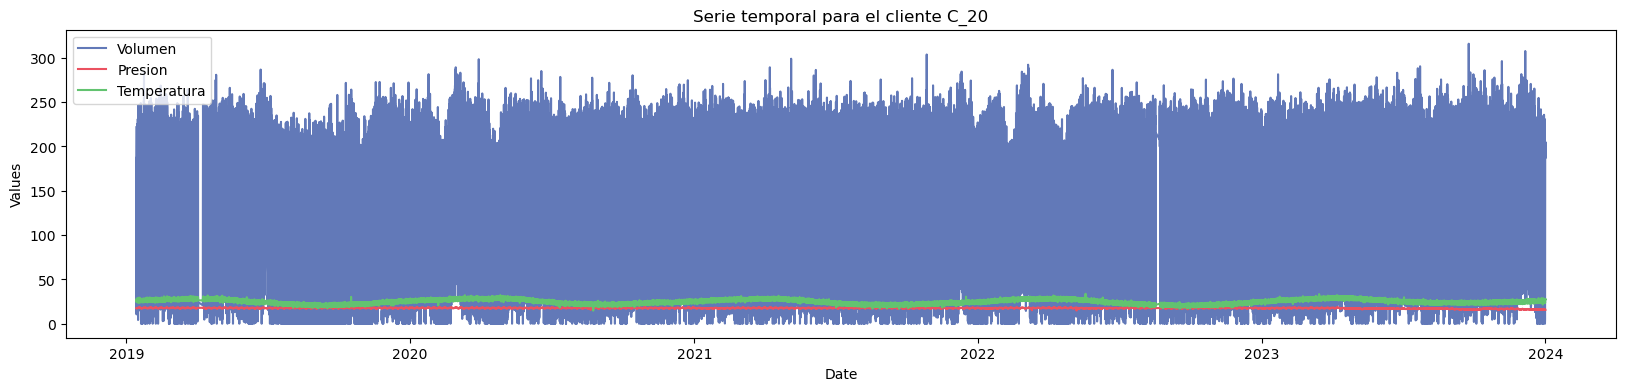

In [10]:
import matplotlib.pyplot as plt

for client in df['Cliente'].unique():
    client_data = df[df['Cliente'] == client]
    
    plt.figure(figsize=(20, 4))
    plt.plot(client_data['Fecha'], client_data['Volumen'], label='Volumen',color='#6279B8')
    plt.plot(client_data['Fecha'], client_data['Presion'], label='Presion',color='#EB5160')
    plt.plot(client_data['Fecha'], client_data['Temperatura'], label='Temperatura',color='#62C370')
    plt.title(f'Serie temporal para el cliente {client}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


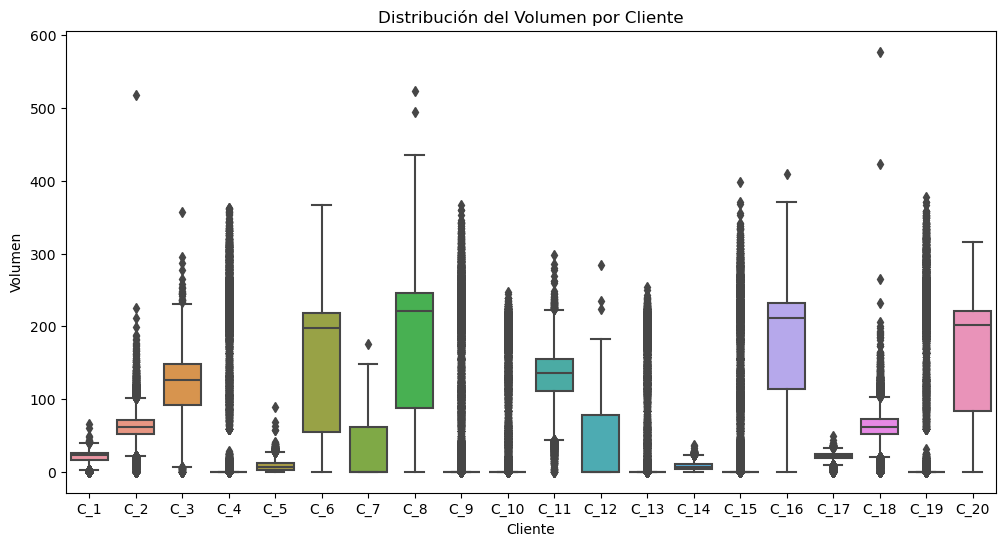

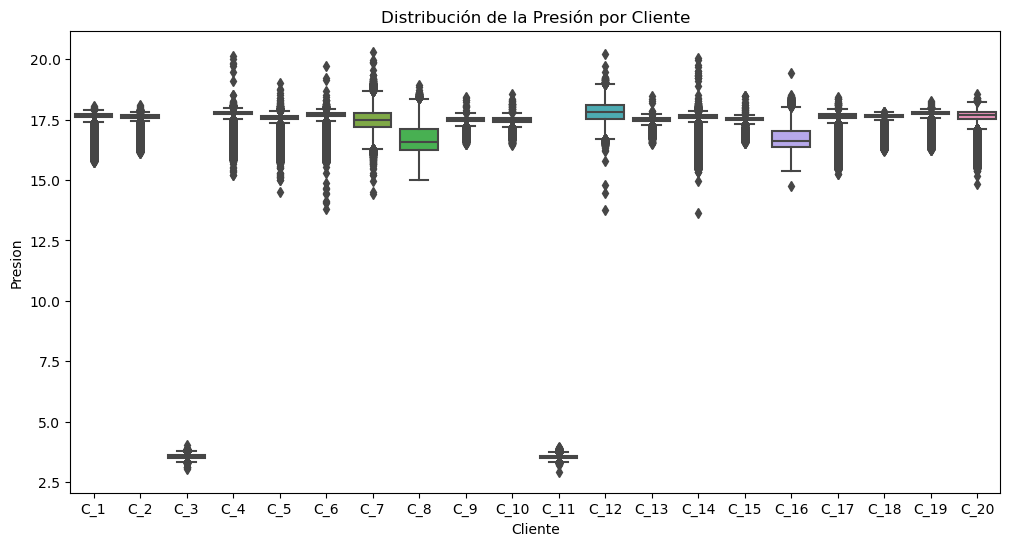

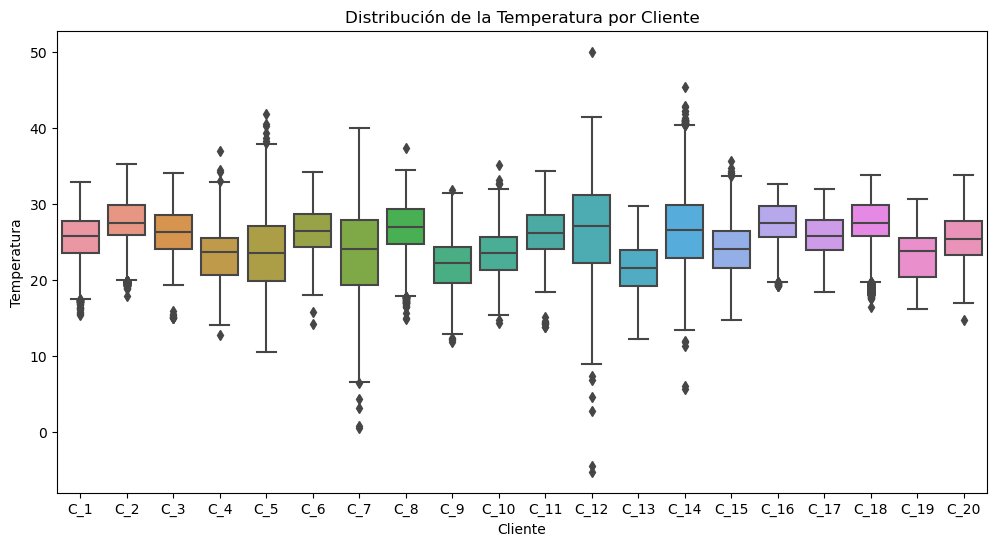

In [11]:
import seaborn as sns

# Boxplot para Volumen por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cliente', y='Volumen', data=df)
plt.title('Distribución del Volumen por Cliente')
plt.show()

# Boxplot para Presión por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cliente', y='Presion', data=df)
plt.title('Distribución de la Presión por Cliente')
plt.show()

# Boxplot para Temperatura por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cliente', y='Temperatura', data=df)
plt.title('Distribución de la Temperatura por Cliente')
plt.show()


In [12]:
import pandas as pd
import numpy as np

# Variables a analizar
variables = ['Presion', 'Temperatura', 'Volumen']

# Función para ordenar correctamente los índices de clientes
def ordenar_clientes(clientes):
    return sorted(clientes, key=lambda x: int(x.split('_')[1]))

# Crear y mostrar las estadísticas descriptivas por cada variable, con clientes en orden numérico
for var in variables:
    print(f"\nEstadísticas descriptivas para {var} por cliente:")
    
    # Crear DataFrame con estadísticas por cliente y ordenarlos
    resumen_df = df.groupby('Cliente')[var].describe()
    resumen_df = resumen_df.reindex(ordenar_clientes(resumen_df.index))
    
    # Mostrar la tabla
    from IPython.display import display, HTML
    display(HTML(resumen_df.to_html()))







Estadísticas descriptivas para Presion por cliente:


,count,mean,std,min,25%,50%,75%,max
Cliente,,,,,,,,
C_1,43412.0,17.535934,0.358310,15.742337,17.590781,17.651439,17.711107,18.074274
C_2,41382.0,17.526440,0.318984,16.129015,17.581711,17.637486,17.675036,18.106402
C_3,42248.0,3.569593,0.080619,3.057171,3.512245,3.559350,3.617770,4.037030
C_4,42305.0,17.639754,0.390818,15.214996,17.711300,17.779337,17.823517,20.112931
C_5,43415.0,17.489345,0.370395,14.489896,17.537779,17.614668,17.667026,19.009352
C_6,42808.0,17.569108,0.396870,13.810026,17.634058,17.707247,17.758536,19.720870
C_7,41776.0,17.490812,0.450059,14.418261,17.188626,17.493758,17.778862,20.307852
C_8,43147.0,16.705630,0.598608,14.996490,16.258053,16.567409,17.104602,18.950955
C_9,42428.0,17.466627,0.157897,16.486477,17.428230,17.497293,17.559919,18.430469



Estadísticas descriptivas para Temperatura por cliente:


,count,mean,std,min,25%,50%,75%,max
Cliente,,,,,,,,
C_1,43412.0,25.575853,2.756246,15.401803,23.587235,25.711326,27.695776,32.869112
C_2,41382.0,27.673040,2.345356,17.884059,25.859054,27.493743,29.825196,35.208346
C_3,42248.0,26.348434,2.618993,14.933032,24.101076,26.345011,28.505966,34.009233
C_4,42305.0,23.241102,3.023639,12.711813,20.590375,23.676157,25.554712,36.897044
C_5,43415.0,23.665282,5.051309,10.500638,19.851985,23.498130,27.070649,41.762232
C_6,42808.0,26.393254,2.722269,14.157366,24.321397,26.366504,28.666090,34.186338
C_7,41776.0,23.622548,4.920941,0.433436,19.295809,24.074797,27.865012,39.982239
C_8,43147.0,26.814551,2.971490,14.838703,24.721773,26.896418,29.333184,37.368959
C_9,42428.0,22.073596,2.914694,11.820104,19.627220,22.247295,24.381765,31.783964



Estadísticas descriptivas para Volumen por cliente:


,count,mean,std,min,25%,50%,75%,max
Cliente,,,,,,,,
C_1,43412.0,19.976401,7.939171,0.0,16.248989,22.470213,25.533223,65.936644
C_2,41382.0,61.819045,17.495571,0.0,51.809989,61.814487,71.742183,517.564868
C_3,42248.0,117.500121,39.856005,0.0,91.205546,125.520304,147.830979,356.724008
C_4,42305.0,17.351570,60.953148,0.0,0.000000,0.000000,0.004557,363.009776
C_5,43415.0,7.817773,6.410365,0.0,2.208475,7.119554,12.111280,89.245051
C_6,42808.0,153.799976,84.906689,0.0,54.236215,198.223662,218.285302,366.656382
C_7,41776.0,27.294379,33.875124,0.0,0.000000,0.000000,61.996865,175.763858
C_8,43147.0,178.591825,90.850586,0.0,87.837958,221.111139,246.243866,522.780891
C_9,42428.0,12.734989,49.539841,0.0,0.000000,0.000000,0.000000,366.016120
